In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
df = pd.read_csv("../data/d02_intermediate/housing_cleaned.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20433 non-null  int64  
 1   longitude            20433 non-null  float64
 2   latitude             20433 non-null  float64
 3   housing_median_age   20433 non-null  float64
 4   total_rooms          20433 non-null  float64
 5   total_bedrooms       20433 non-null  float64
 6   population           20433 non-null  float64
 7   households           20433 non-null  float64
 8   median_income        20433 non-null  float64
 9   median_house_value   20433 non-null  float64
 10  ocean_proximity      20433 non-null  object 
 11  rooms_per_household  20433 non-null  float64
 12  pop_per_household    20433 non-null  float64
 13  bedrooms_per_room    20433 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 2.2+ MB


# Which Factors Influence House Prices:

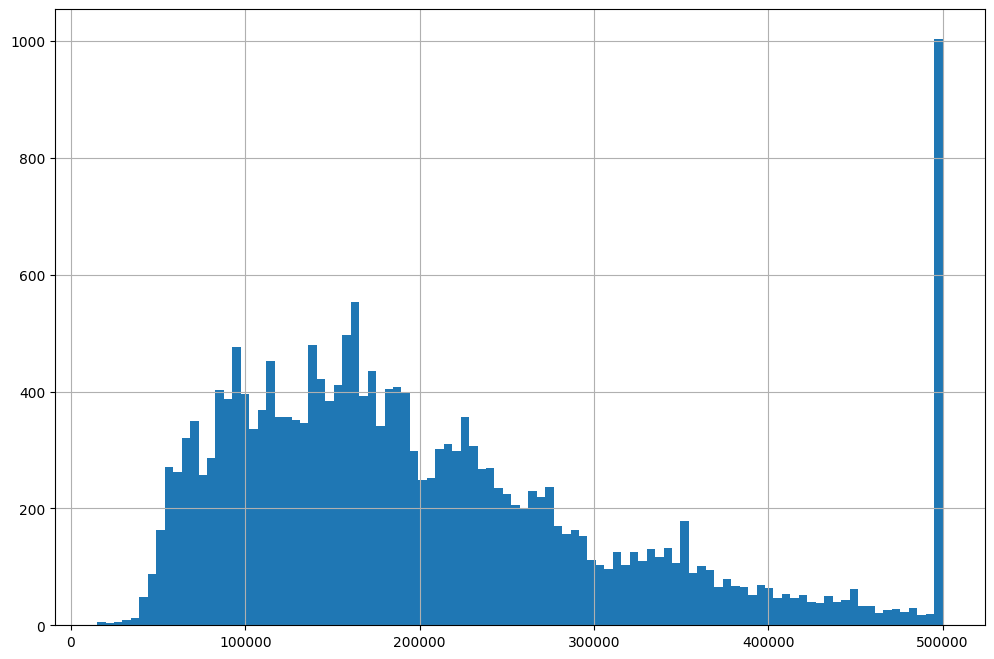

In [33]:
df.median_house_value.hist(bins=100, figsize=(12,8))
plt.show()

In [45]:
#df.corr().median_house_value.sort_values(asceding=False)

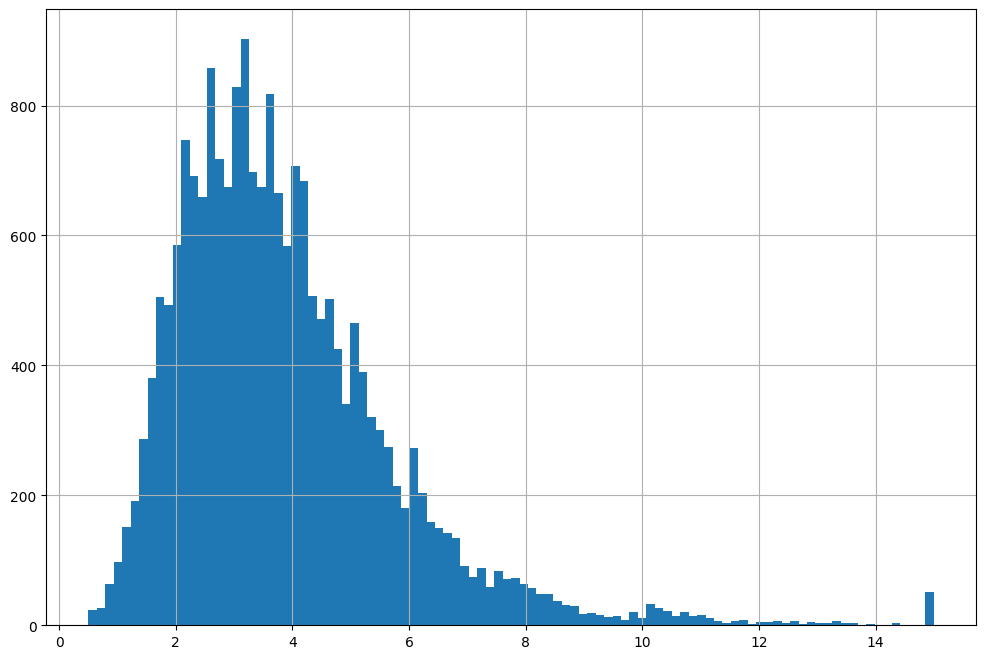

In [42]:
df.median_income.hist(bins=100, figsize=(12,8))
plt.show()

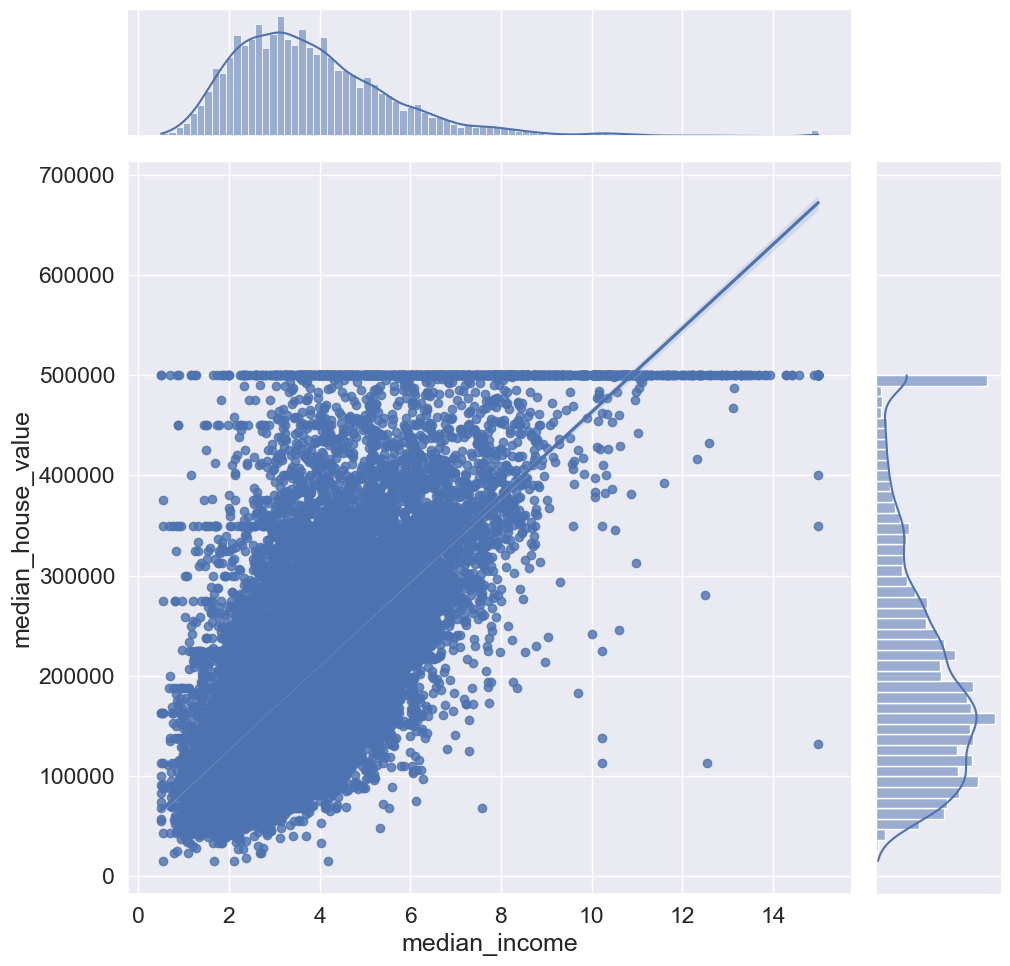

In [46]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x="median_income", y="median_house_value", kind="reg", height=10)
plt.show()

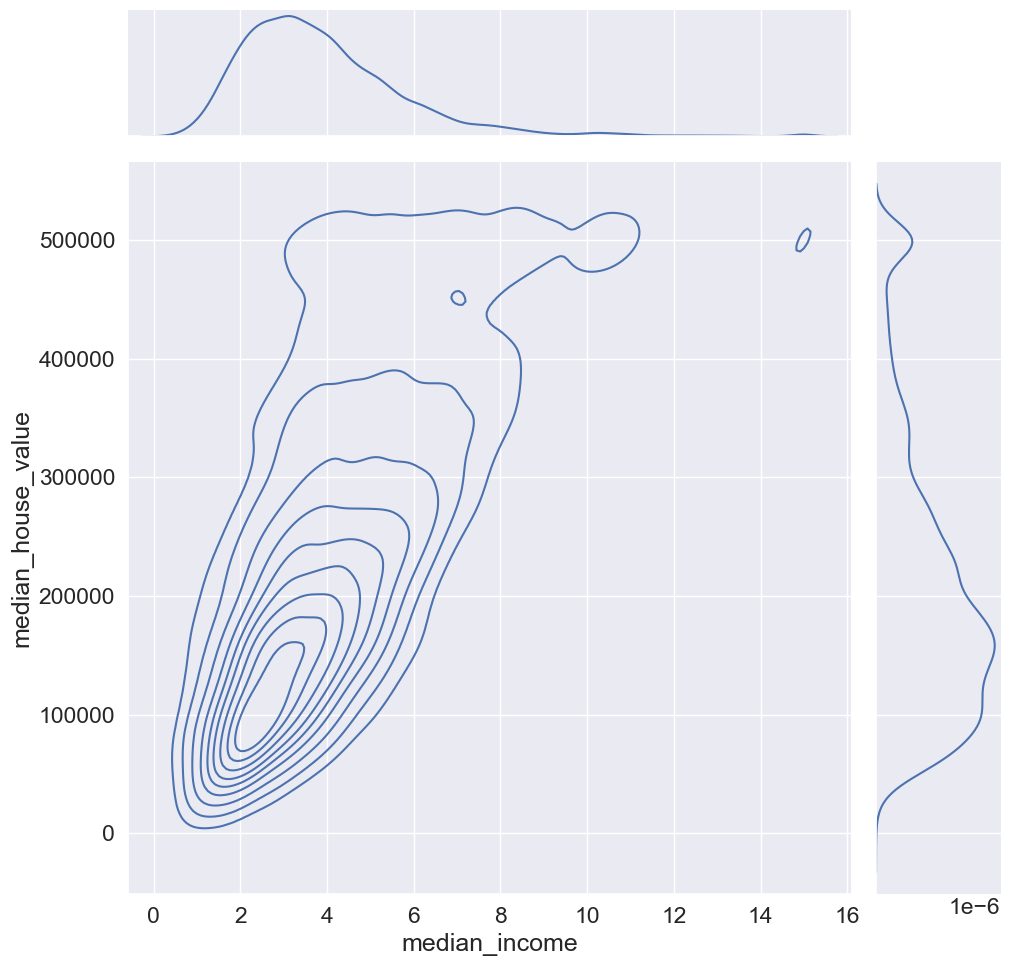

In [47]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x="median_income", y="median_house_value", kind="kde", height=10)
plt.show()

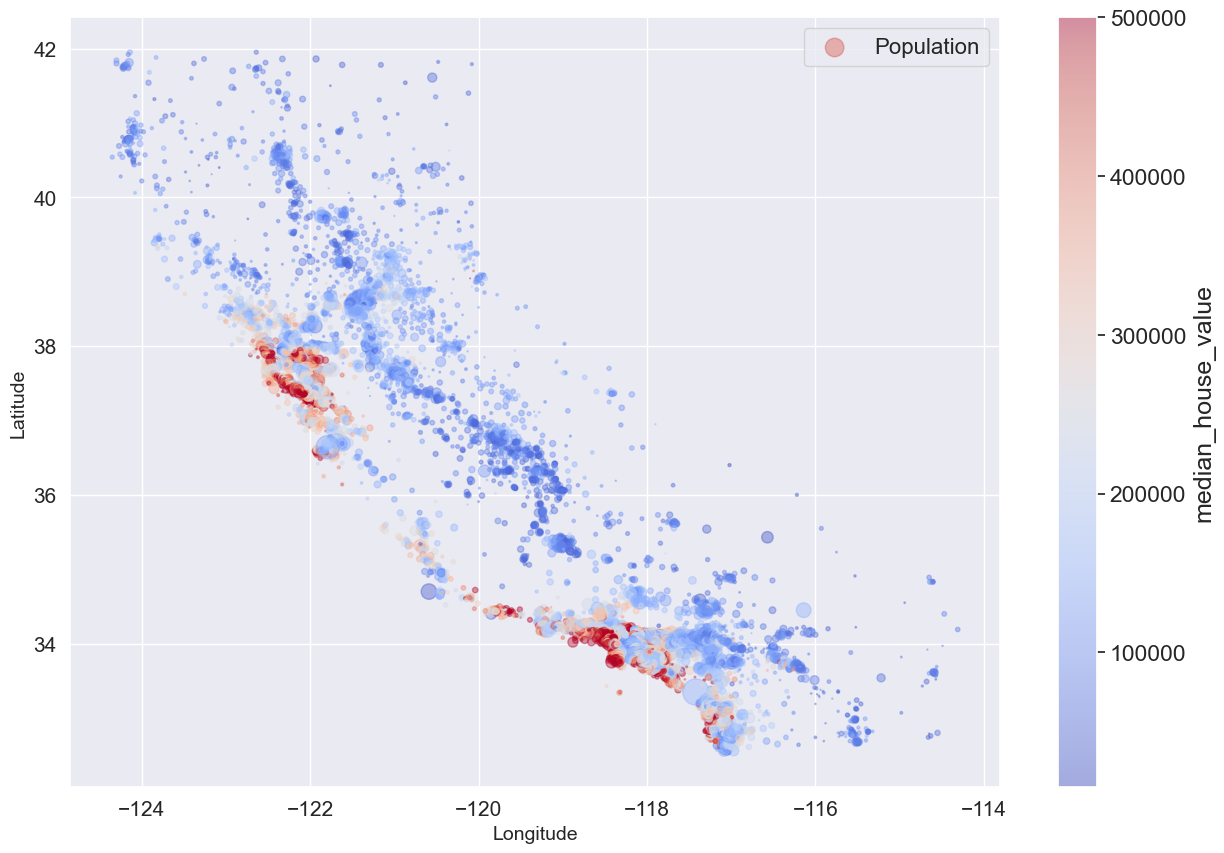

In [48]:
df.plot(kind="scatter", x="longitude", y="latitude", 
        s=df.population/100, label="Population", figsize=(15,10), 
        c="median_house_value", cmap="coolwarm",
        colorbar=True, alpha=0.4, fontsize=15, sharex= False)


plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [50]:
import matplotlib.image as mpimg

In [51]:
california_img = mpimg.imread("../data/images/california.png")

In [52]:
california_img

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

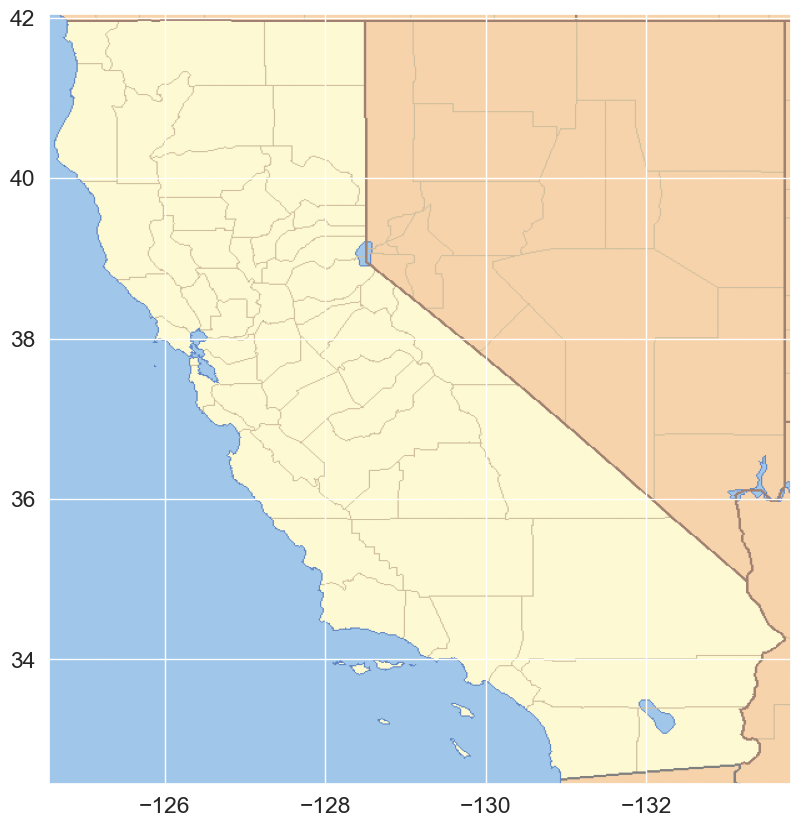

In [53]:
plt.figure(figsize=(15,10))
plt.imshow(california_img, extent=[-124.55, -133.80, 32.45, 42.05])
plt.show()

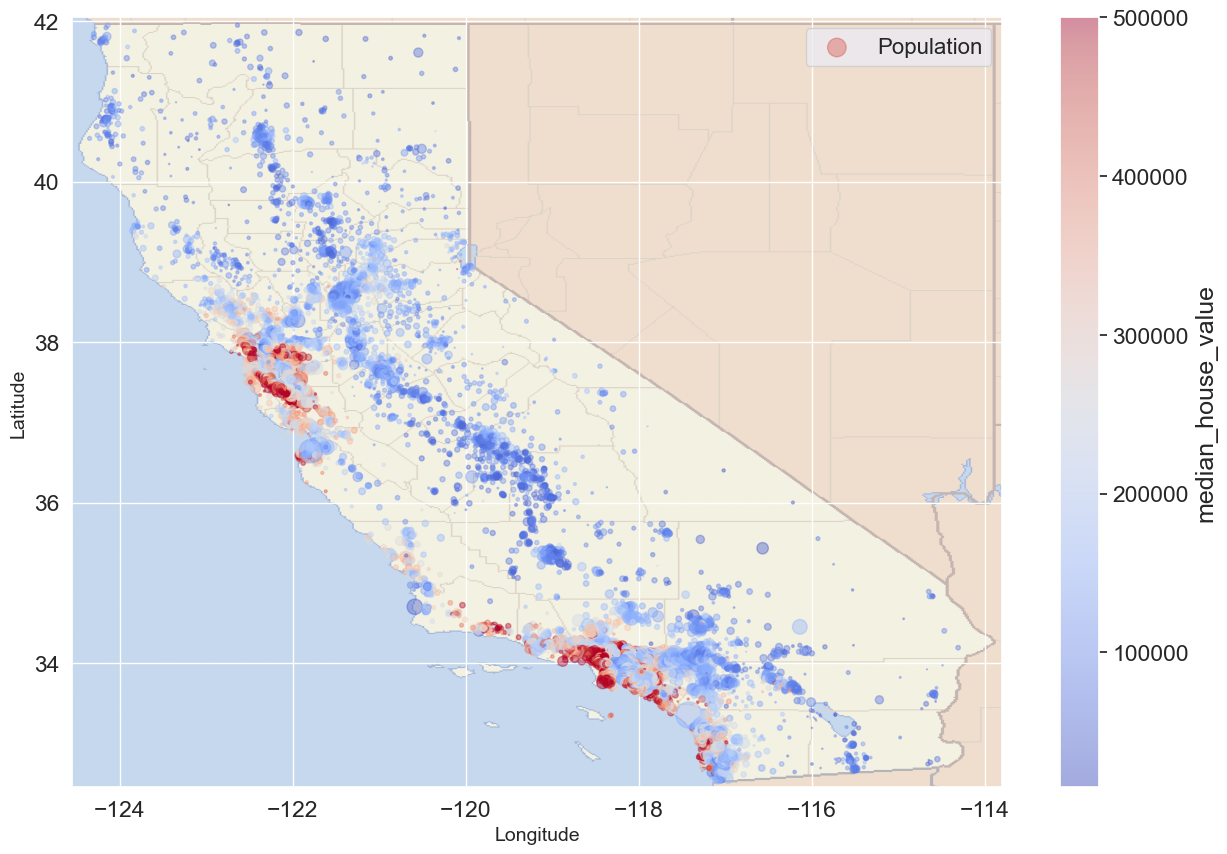

In [58]:
ax = df.plot(kind="scatter", x="longitude", y="latitude", 
             s=df.population/100, label="Population", figsize=(15,10), 
             c="median_house_value", cmap="coolwarm", colorbar=True, alpha=0.4)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap="jet", aspect=ax.get_aspect(), zorder=0)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [55]:
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [67]:
df_loc = df[df.ocean_proximity == prox[3]].copy()

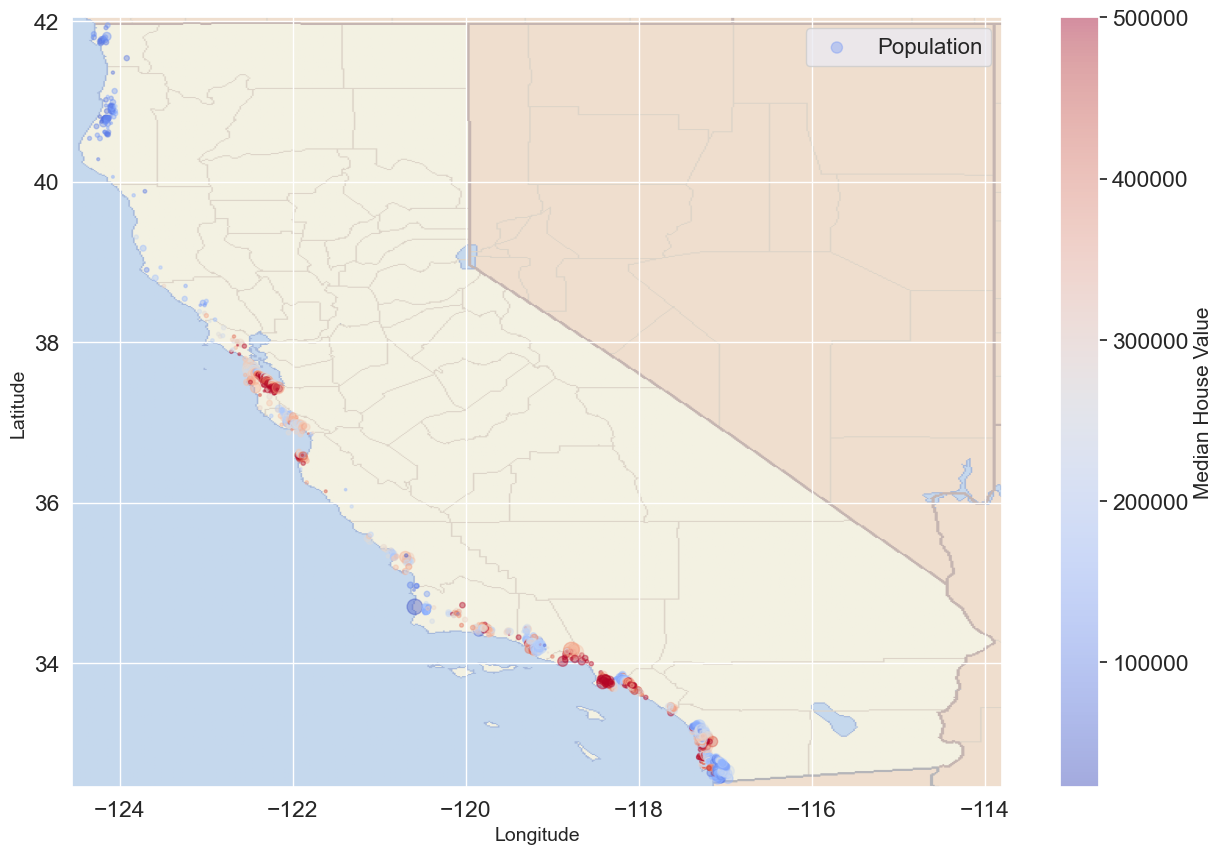

In [68]:
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(df_loc['longitude'], df_loc['latitude'], 
                     s=df_loc['population']/100, 
                     c=df_loc['median_house_value'], cmap='coolwarm', 
                     alpha=0.4, label="Population")

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap="jet", aspect='auto', zorder=0)


cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value', fontsize=15)


plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [88]:
df["income_cat"] = pd.qcut(df.median_income, q=[0, 0.25, 0.5, 0.75, 0.95, 1],
                           labels=["Low", "Below_Average", "Above_Average", "High", "Very High"])

In [72]:
df.income_cat.value_counts(normalize=True)

income_cat
Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very High        0.050017
Name: proportion, dtype: float64

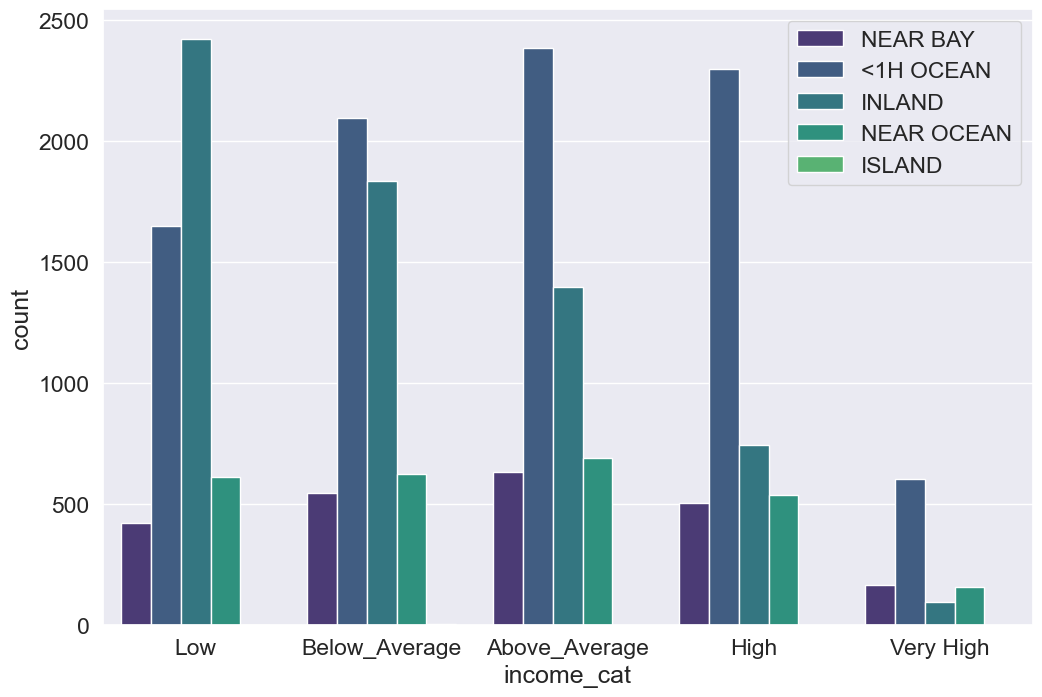

In [76]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette="viridis")
sns.countplot(data=df, x="income_cat", hue="ocean_proximity")
plt.legend(loc=1)
plt.show()

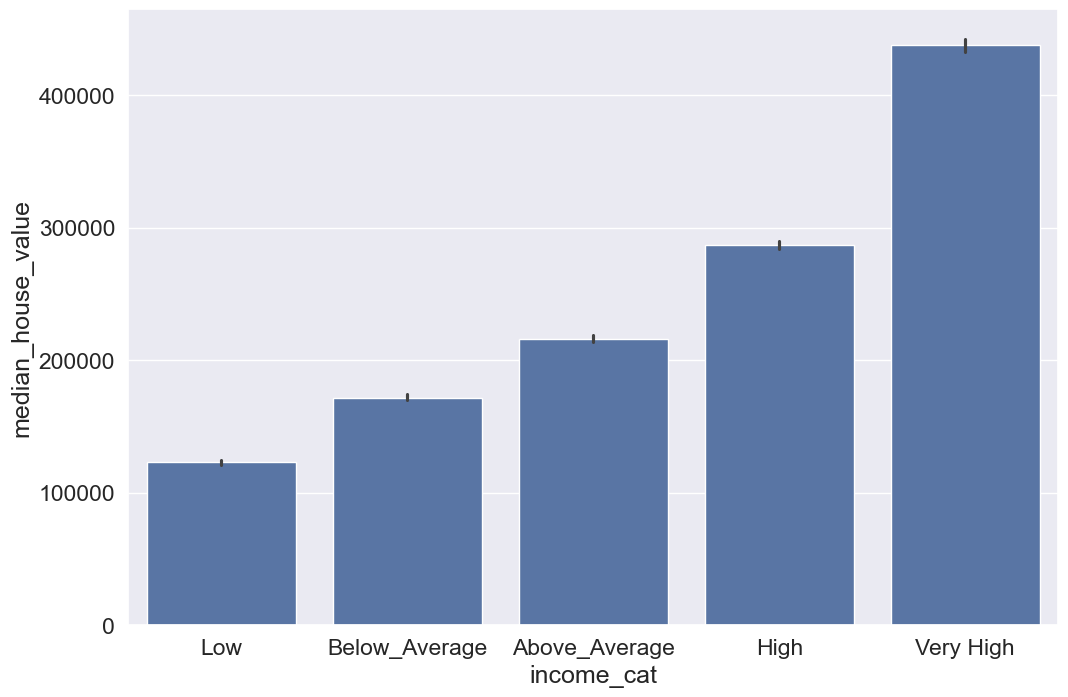

In [79]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data=df, x="income_cat", y="median_house_value", dodge=True)
plt.show()

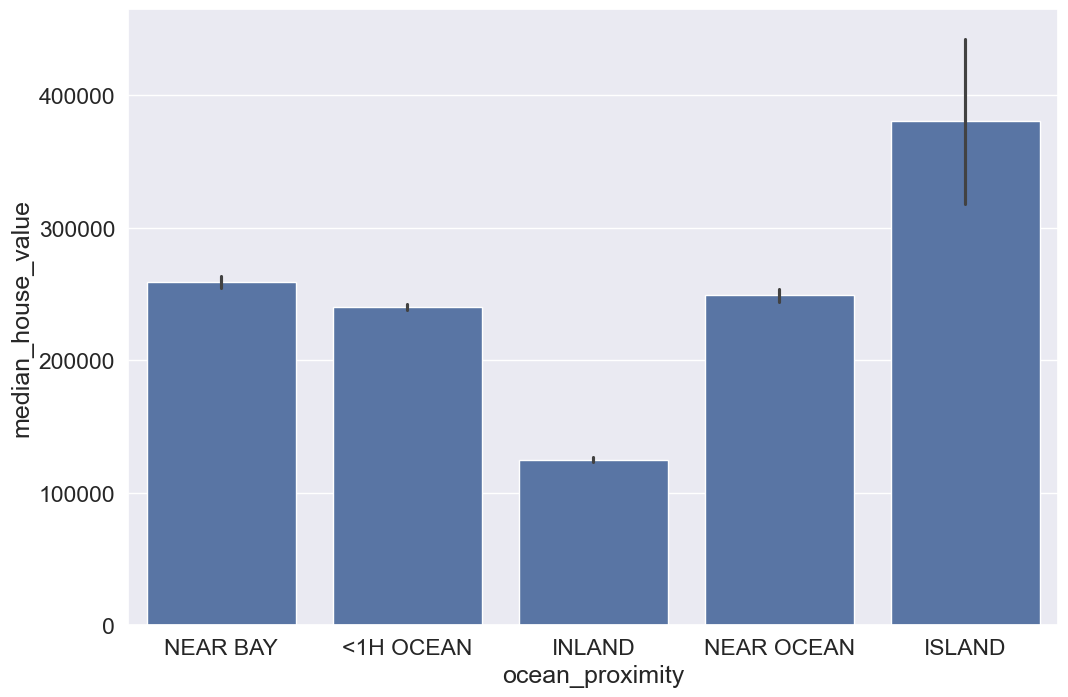

In [81]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data=df, x="ocean_proximity", y="median_house_value", dodge=True)
plt.show()

In [82]:
matrix = df.groupby(['income_cat', 'ocean_proximity']).median_house_value.mean().unstack().drop(columns=["ISLAND"])

C:\Users\vinic\AppData\Local\Temp\ipykernel_1356\246027408.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  matrix = df.groupby(['income_cat', 'ocean_proximity']).median_house_value.mean().unstack().drop(columns=["ISLAND"])


In [83]:
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below_Average,197236,115124,220196,208665
Above_Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very High,439784,347571,451015,468739


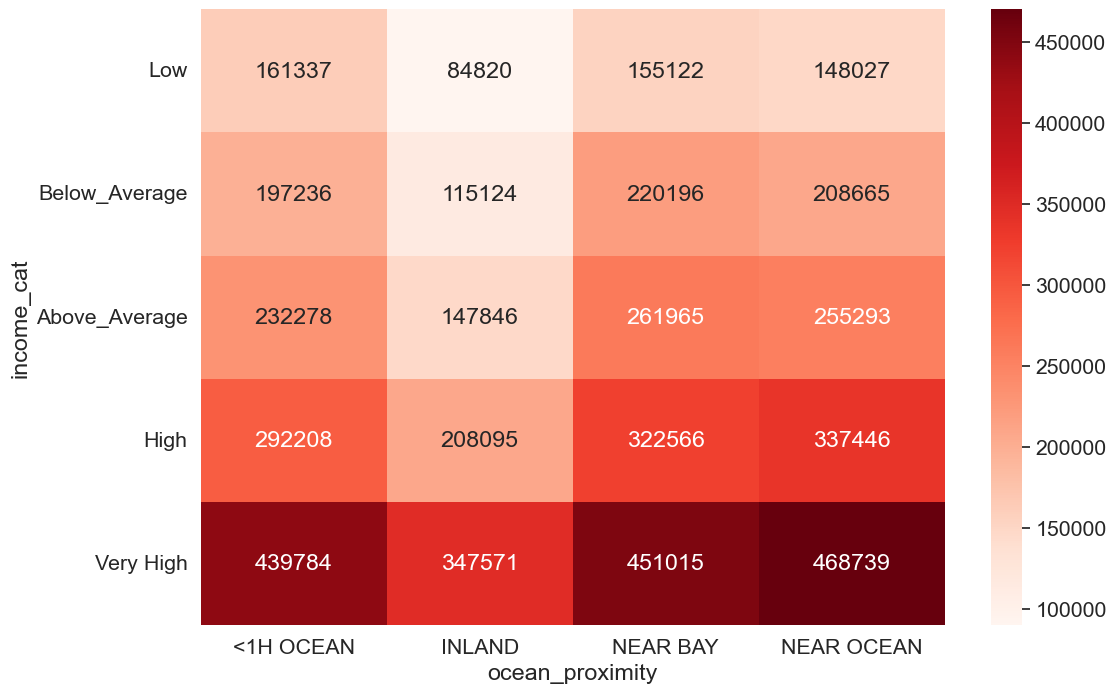

In [84]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap="Reds", annot= True, fmt="d", vmin= 90000, vmax=470000)
plt.show()